In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Directory to save plots
save_dir = './Trending Video Likes to Views Ratio Analysis PLOTS/'

## Trending Videos by Year

In [3]:
# Read in yearly data
total_2018_df = pd.read_csv('./transformed-data/data_2018_all.csv')
total_2020_df = pd.read_csv('./transformed-data/data_2020_all.csv')

### Total Trending Videos

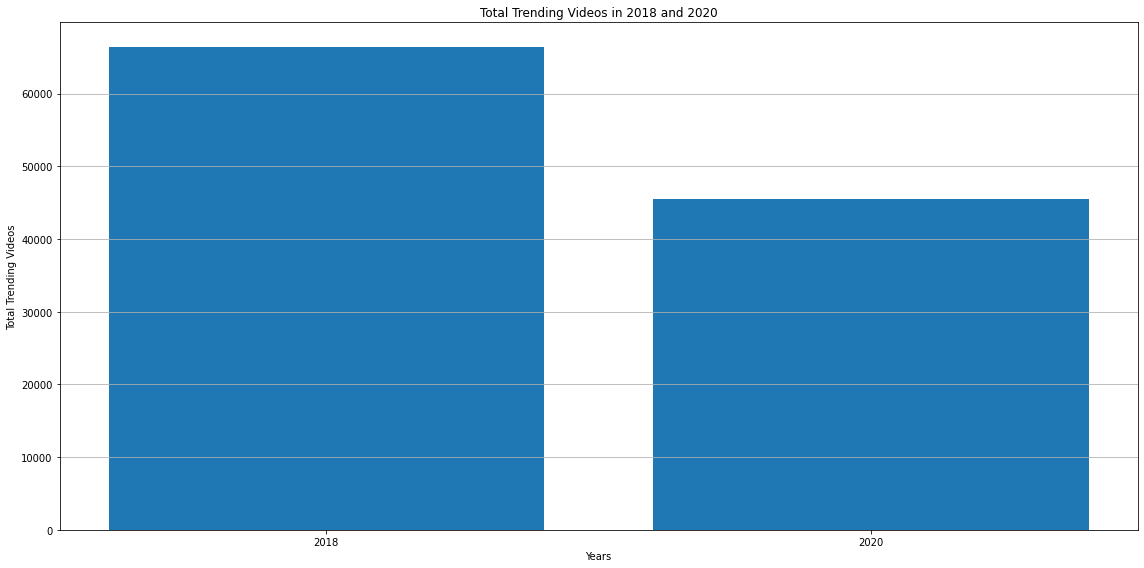

In [4]:
# Total trending videos yearly
totals = [total_2018_df.shape[0], total_2020_df.shape[0]]  # number of rows of each year

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Years')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Total Trending Videos in 2018 and 2020'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()

# Save plot to file
# file_title = title + '.png'
# plt.savefig(save_dir + file_title, dpi=100,  transparent=False)

### Total Trending Videos by Category by Year

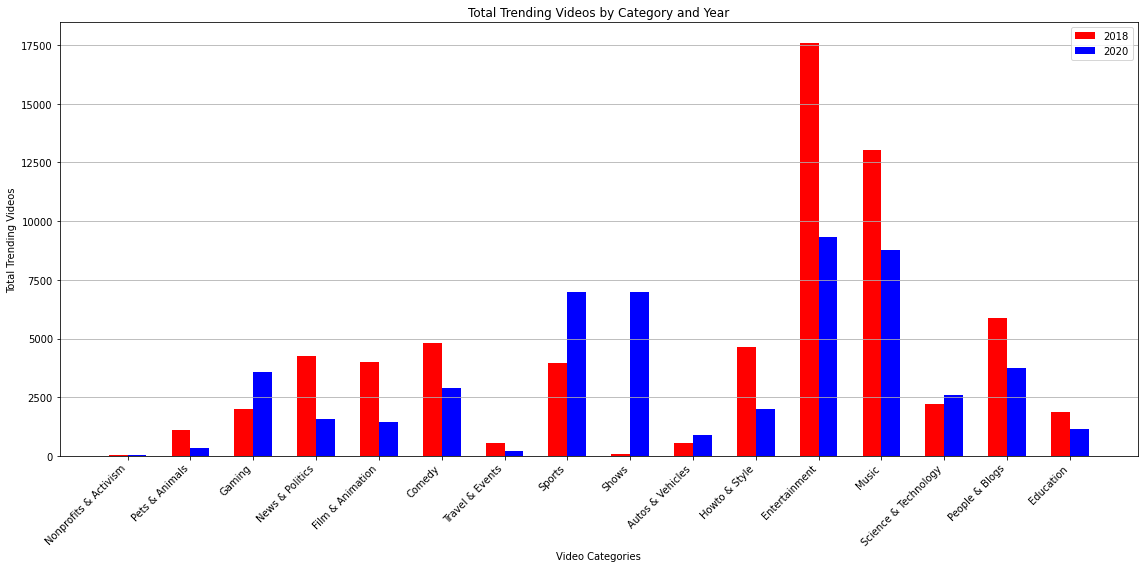

In [5]:
# Total trending videos by category by year
cats_count_2018_series = total_2018_df.groupby('cat_name').count()['title']
cats_count_2020_series = total_2020_df.groupby('cat_name').count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
        sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Number of Videos per Category

In [6]:
total_cat_count_merged =  cats_count_2018_series.to_frame().merge(cats_count_2020_series, on='cat_name')
total_cat_count_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "title_x": "Trending Videos 2018", "title_y": "Trending Videos 2018"})

,Category,Trending Videos 2018,Trending Videos 2018
0,Autos & Vehicles,538,903
1,Comedy,4802,2899
2,Education,1868,1149
3,Entertainment,17587,9328
4,Film & Animation,3989,1453
5,Gaming,2010,3582
6,Howto & Style,4634,2006
7,Music,13026,8771
8,News & Politics,4256,1560
9,Nonprofits & Activism,34,20


### Average Likes to Views Ratio by Year

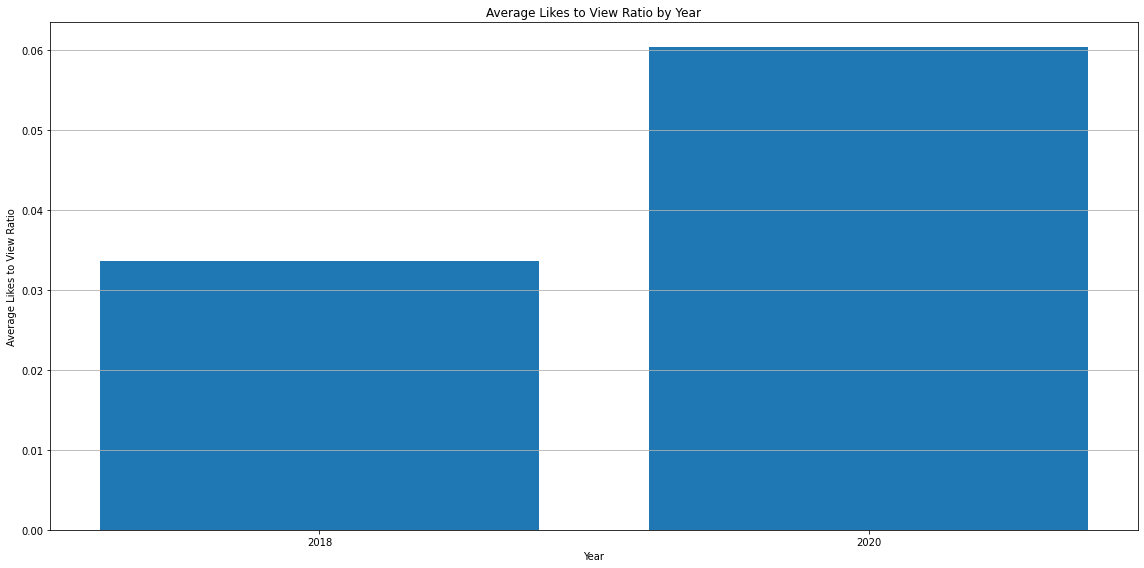

In [7]:
# Avg likes to view ratio by year
ratio_2018_series = total_2018_df['likes_to_views'].mean()
ratio_2020_series = total_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average Likes to View Ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to View Ratio by Year'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()

# Save plot to file
# file_title = title + '.png'
# plt.savefig(save_dir + file_title, dpi=100)

### Summary of All Data

In [8]:
# Summary of likes to views data
print("Total Views per video 2018: " + str(total_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(total_2020_df['views'].sum()))
print("Average Likes per video 2018: " + str(total_2018_df['likes'].mean()))
print("Average Likes per video 2020: " + str(total_2020_df['likes'].mean()))
print("Average Likes to Views ratio 2018: {}" .format(ratio_2018_series))
print("Average Likes to Views ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 199167496370
Total Views per video 2020: 107923273604
Average Likes per video 2018: 75840.77171051642
Average Likes per video 2020: 148919.03885242663
Average Likes to Views ratio 2018: 0.033632002005378955
Average Likes to Views ratio 2020: 0.060402189045125745


### Average Likes to Views Ratio by Category by Year

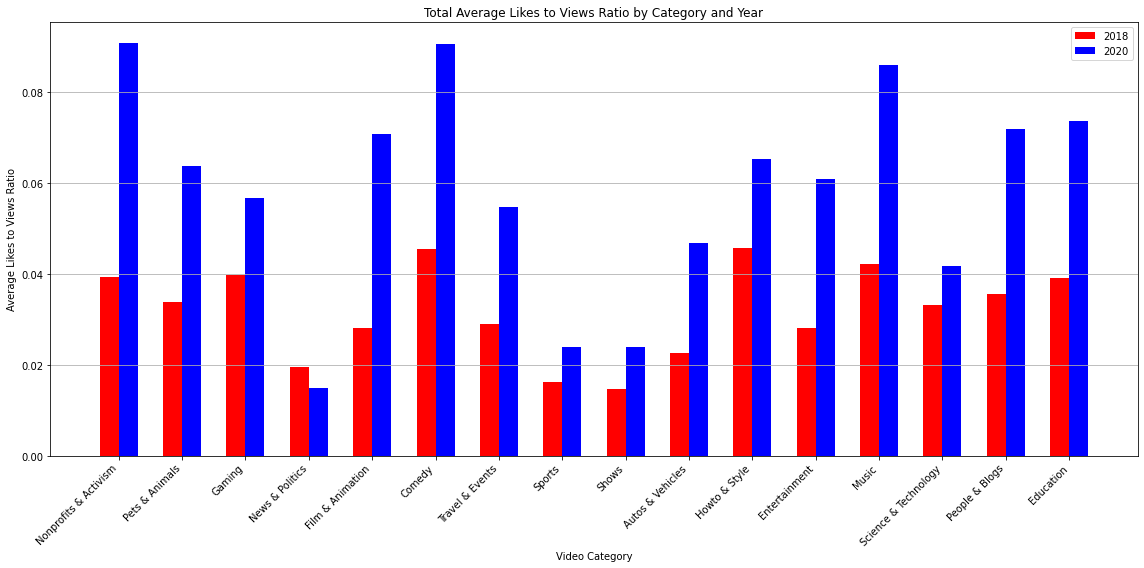

In [9]:
ratio_2018_series = total_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = total_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
        sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Total Average Likes to Views Ratio by Category and Year'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [10]:
avg_cat_ratio_merged =  ratio_2018_series.to_frame().merge(ratio_2020_series, on='cat_name')
avg_cat_ratio_merged = avg_cat_ratio_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "likes_to_views_x": "Avg L-T-V Ratio 2018", "likes_to_views_y": "Avg L-T-V Ratio 2020"})
avg_cat_ratio_merged

,Category,Avg L-T-V Ratio 2018,Avg L-T-V Ratio 2020
0,Autos & Vehicles,0.022559,0.046761
1,Comedy,0.045432,0.090507
2,Education,0.039131,0.073553
3,Entertainment,0.028077,0.060992
4,Film & Animation,0.028035,0.070729
5,Gaming,0.039788,0.056813
6,Howto & Style,0.045701,0.065284
7,Music,0.042180,0.085950
8,News & Politics,0.019624,0.014887
9,Nonprofits & Activism,0.039397,0.090799


### Save Data for Analysis

In [11]:
# categorize data by video category
cat_count_total_2018 = total_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_total_2018['likes_to_views'] = ((cat_count_total_2018['likes'] / cat_count_total_2018['views'])*100)
cat_count_total_2018 = cat_count_total_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_total_2018 = cat_count_total_2018[(cat_count_total_2018['cat_name'] != 'Movies') & (cat_count_total_2018['cat_name'] != 'Shows')]
cat_count_total_2018 = cat_count_total_2018.sort_values(by='likes_to_views')

cat_count_total_2020 = total_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_total_2020['likes_to_views'] = ((cat_count_total_2020['likes'] / cat_count_total_2020['views'])*100)
cat_count_total_2020 = cat_count_total_2020.rename(columns={'category_id':'cat_count'})
cat_count_total_2020 = cat_count_total_2020.sort_values(by='likes_to_views')

# comparing likes to views for each 
cat_count_total_merged = cat_count_total_2018.merge(cat_count_total_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))

# save df for statistics analysis
total_merged_likes_to_views = cat_count_total_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]
total_merged_likes_to_views.to_csv('./transformed-data/total_merged_likes_to_views.csv', index=False)

### Total Likes by Year

                 cat_name  likes_2018  likes_2020
0        Autos & Vehicles     6595338    47126002
1         Travel & Events     6335731     4403778
2        Film & Animation   224788551   140937638
3         News & Politics    47146279    28013042
4                  Sports   169692485   206750255
5                   Music  2896947716  3280370080
6    Science & Technology    76168898   213157550
7          People & Blogs   213771005   462501395
8           Entertainment   794700801  1308107137
9          Pets & Animals    22149635    14649611
10              Education    47858556    85911538
11                 Gaming   102845682   515437678
12          Howto & Style   136562339   131067656
13                 Comedy   280667076   345219549
14  Nonprofits & Activism    14716813      651744


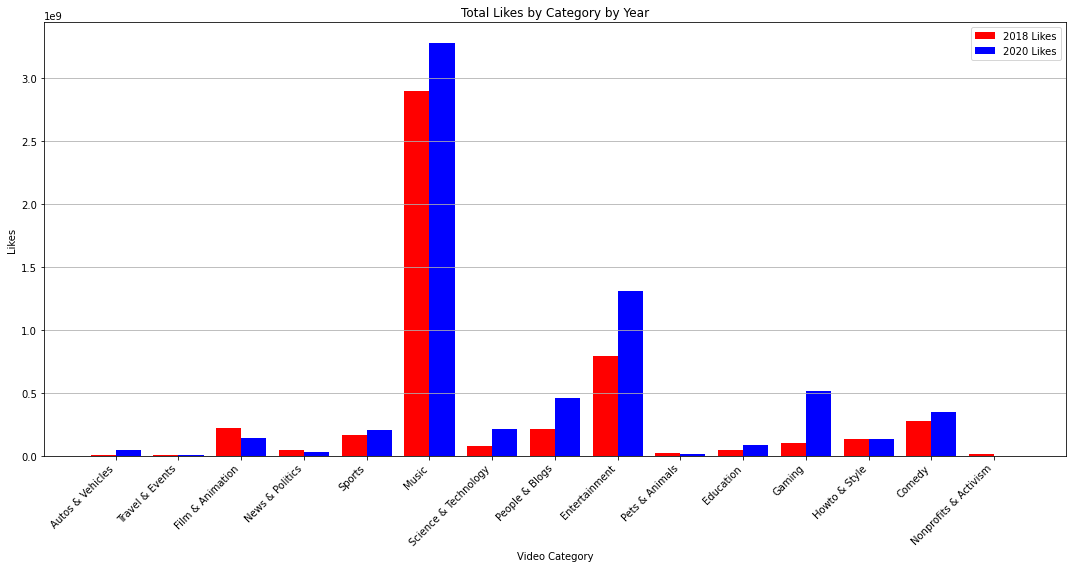

In [12]:
# comparing likes to views for each 
cat_count_total_merged = cat_count_total_2018.merge(cat_count_total_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_total_merged
print(cat_count_total_merged[['cat_name', 'likes_2018', 'likes_2020']])

# save df for statistics analysis
total_merged_likes = cat_count_total_merged[['cat_name', 'likes_2018', 'likes_2020']]
total_merged_likes.to_csv('./transformed-data/total_merged_likes.csv', index=False)

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_total_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_total_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_total_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_total_merged['cat_name'])
ax.set_xticklabels(cat_count_total_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')
title = "Total Likes by Category by Year"
plt.title(title)
plt.tight_layout()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

## Canada Data

In [13]:
# read in data
ca_2018_df = pd.read_csv('./transformed-data/2018_CA_data.csv')
ca_2020_df = pd.read_csv('./transformed-data/2020_CA_data.csv')

### Total Trending Videos in Canada

Trending Video Count Canada 2018: 22268
Trending Video Count Canada 2020: 15174


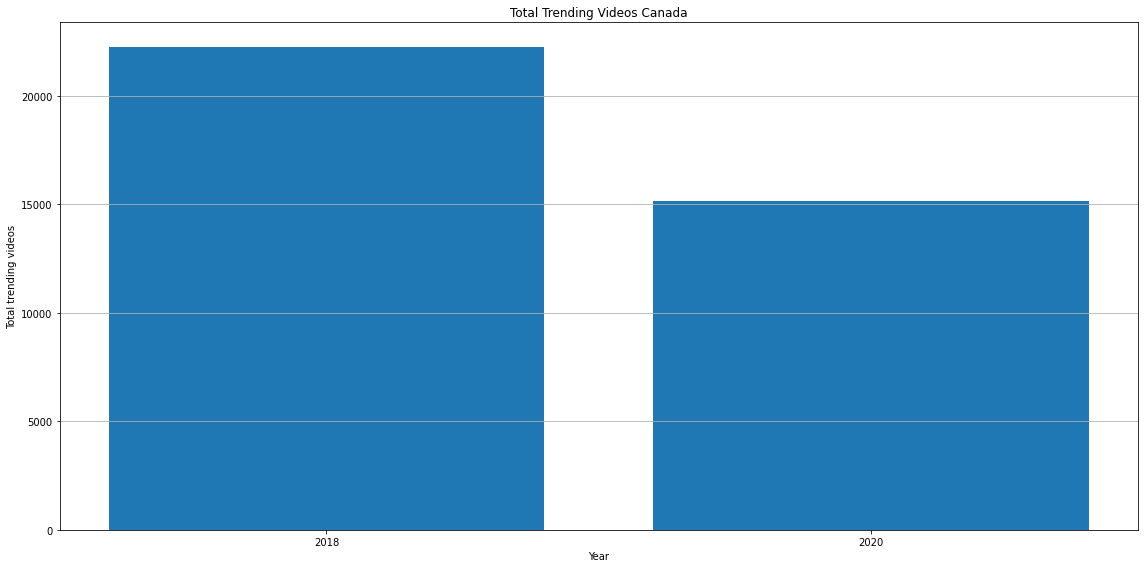

In [14]:
# Total trending videos
totals = [ca_2018_df.shape[0], ca_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count Canada 2018: " + str(ca_2018_df.shape[0]))
print("Trending Video Count Canada 2020: " + str(ca_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total trending videos')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Total Trending Videos Canada'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()

# Save plot to file
# file_title ='CA - ' + title + '.png'
# plt.savefig(save_dir + file_title, dpi=100)

### Total Trending Videos by Category by Year in Canada

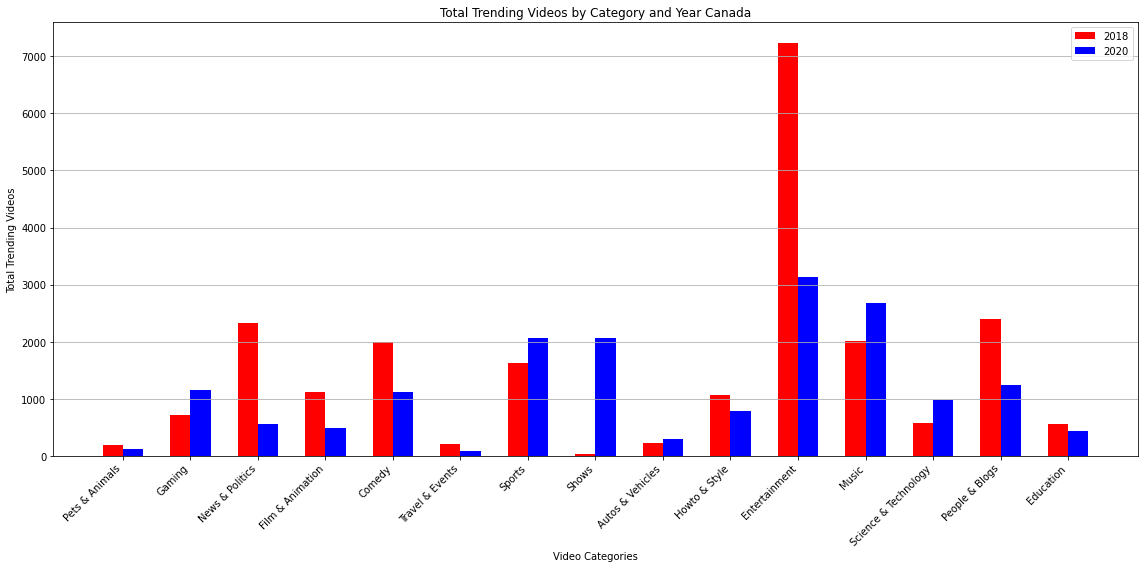

In [15]:
# Total trending videos by category by year
cats_count_2018_series = ca_2018_df.groupby('cat_name').count()['title']
cats_count_2020_series = ca_2020_df.groupby('cat_name').count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
        sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year Canada'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Number of Videos per Category

In [16]:
ca_cat_count_merged =  cats_count_2018_series.to_frame().merge(cats_count_2020_series, on='cat_name')
ca_cat_count_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "title_x": "Trending Videos 2018", "title_y": "Trending Videos 2018"})

,Category,Trending Videos 2018,Trending Videos 2018
0,Autos & Vehicles,218,303
1,Comedy,1987,1115
2,Education,564,429
3,Entertainment,7232,3137
4,Film & Animation,1122,493
5,Gaming,711,1163
6,Howto & Style,1074,791
7,Music,2006,2685
8,News & Politics,2326,556
9,People & Blogs,2398,1242


### Average Likes to Views Ratio by Year

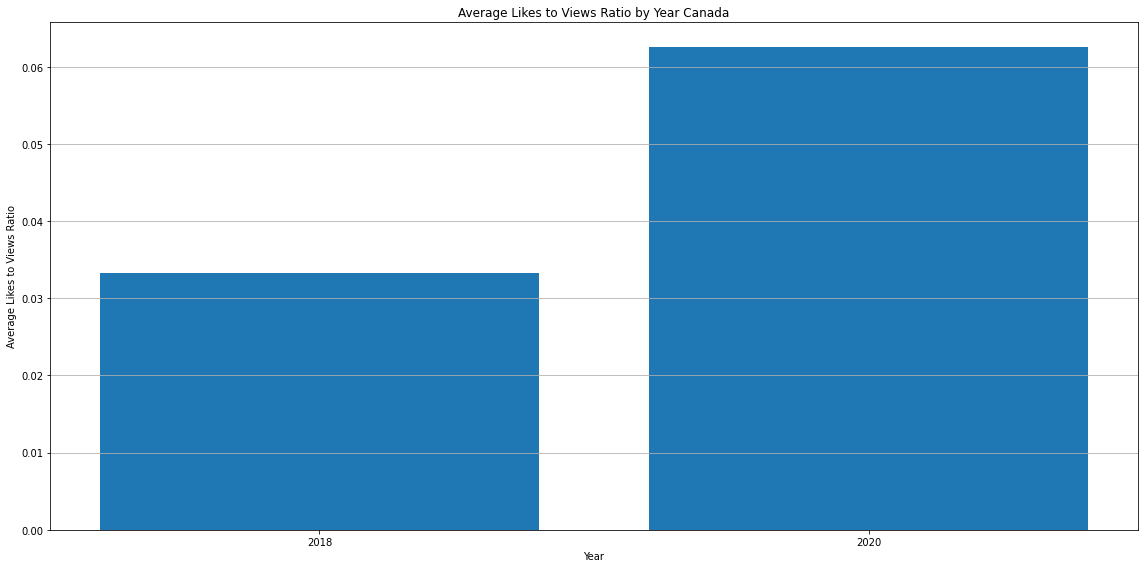

In [17]:
# Avg likes to view ratio
ratio_2018_series = ca_2018_df['likes_to_views'].mean()
ratio_2020_series = ca_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to Views Ratio by Year Canada'
ax.set_title(title)
ax.yaxis.grid(True)
# plt.show()
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Summary of Canada Data

In [18]:
print("Total Views per video 2018: " + str(ca_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(ca_2020_df['views'].sum()))
print("Average Likes per video 2018: " + str(ca_2018_df['likes'].mean()))
print("Average Likes per video 2020: " + str(ca_2020_df['likes'].mean()))
print("Average Like to view ratio 2018: {}" .format(ratio_2018_series))
print("Average Like to view ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 23592888700
Total Views per video 2020: 37182111264
Average Likes per video 2018: 35345.96349021017
Average Likes per video 2020: 156765.34084618426
Average Like to view ratio 2018: 0.03331746926032518
Average Like to view ratio 2020: 0.06261208331984511


### Average Likes to Views Ratio by Category by Year

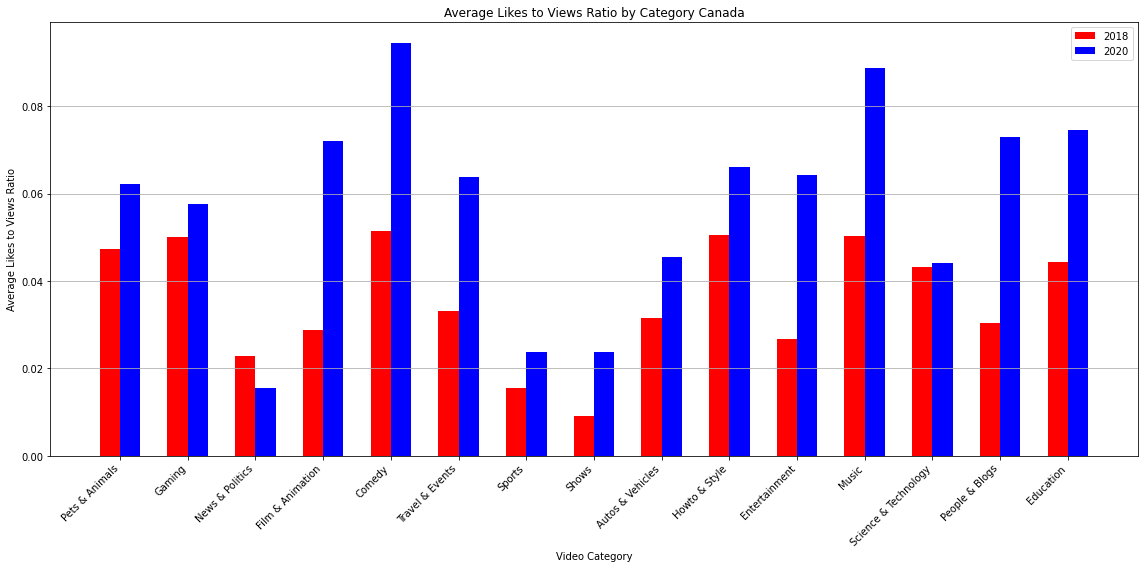

In [19]:
# Avg likes to view ratio by category by year
ratio_2018_series = ca_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = ca_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
        sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category Canada'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [20]:
avg_cat_ratio_merged =  ratio_2018_series.to_frame().merge(ratio_2020_series, on='cat_name')
avg_cat_ratio_merged = avg_cat_ratio_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "likes_to_views_x": "Avg L-T-V Ratio 2018", "likes_to_views_y": "Avg L-T-V Ratio 2020"})
avg_cat_ratio_merged

,Category,Avg L-T-V Ratio 2018,Avg L-T-V Ratio 2020
0,Autos & Vehicles,0.031591,0.045399
1,Comedy,0.051414,0.094433
2,Education,0.044439,0.074549
3,Entertainment,0.026671,0.064155
4,Film & Animation,0.028824,0.072071
5,Gaming,0.050158,0.057516
6,Howto & Style,0.050558,0.066175
7,Music,0.050229,0.088699
8,News & Politics,0.022743,0.015441
9,People & Blogs,0.030374,0.072968


### Save Data for Analysis

In [21]:
# categorize data by video category
cat_count_ca_2018 = ca_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_ca_2018['likes_to_views'] = ((cat_count_ca_2018['likes'] / cat_count_ca_2018['views'])*100)
cat_count_ca_2018 = cat_count_ca_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_ca_2018 = cat_count_ca_2018[(cat_count_ca_2018['cat_name'] != 'Movies') & (cat_count_ca_2018['cat_name'] != 'Shows')]
cat_count_ca_2018 = cat_count_ca_2018.sort_values(by='likes_to_views')

cat_count_ca_2020 = ca_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_ca_2020['likes_to_views'] = ((cat_count_ca_2020['likes'] / cat_count_ca_2020['views'])*100)
cat_count_ca_2020 = cat_count_ca_2020.rename(columns={'category_id':'cat_count'})
cat_count_ca_2020 = cat_count_ca_2020.sort_values(by='likes_to_views')

# comparing likes to views for each 
cat_count_ca_merged = cat_count_ca_2018.merge(cat_count_ca_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_ca_merged

# save df for statistics analysis
ca_merged_likes_to_views = cat_count_ca_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]
ca_merged_likes_to_views.to_csv('./transformed-data/ca_merged_likes_to_views.csv', index=False)

### Total Likes by Year Canada

                cat_name  likes_2018  likes_2020
0                 Sports    35143439    71059718
1       Autos & Vehicles     2700903    14315858
2        News & Politics    19109785    10956205
3        Travel & Events     2252875     2010581
4          Entertainment   182113870   464265908
5       Film & Animation    44596360    49107274
6         People & Blogs    51085931   159616391
7   Science & Technology    19973286    76250451
8          Howto & Style    22445667    49098406
9         Pets & Animals     3509533     5163438
10             Education    11700780    30975522
11                 Music   271667341  1124097488
12                Gaming    27060955   179046330
13                Comedy    93509004   142793712


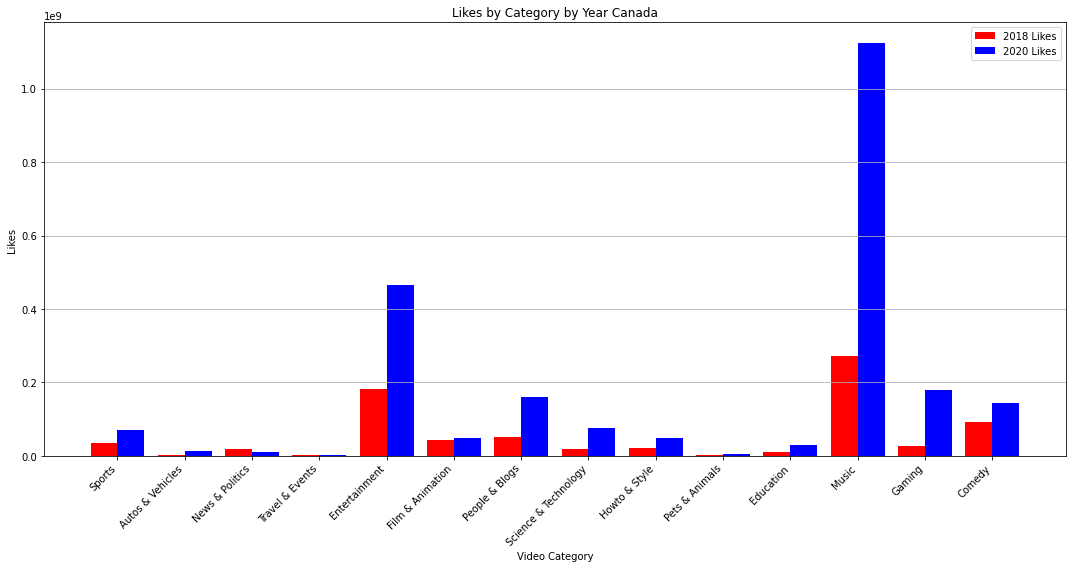

In [22]:
# comparing likes to views for each 
cat_count_ca_merged = cat_count_ca_2018.merge(cat_count_ca_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_ca_merged
print(cat_count_ca_merged[['cat_name', 'likes_2018', 'likes_2020']])

# save df for statistics analysis
ca_merged_likes = cat_count_ca_merged[['cat_name', 'likes_2018', 'likes_2020']]
ca_merged_likes.to_csv('./transformed-data/ca_merged_likes.csv', index=False)

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_ca_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_ca_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_ca_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_ca_merged['cat_name'])
ax.set_xticklabels(cat_count_ca_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

title = "Likes by Category by Year Canada"
plt.title(title)
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

## Great Britain Data

In [23]:
# read in data
gb_2018_df = pd.read_csv('./transformed-data/2018_GB_data.csv')
gb_2020_df = pd.read_csv('./transformed-data/2020_GB_data.csv')

### Total Trending Videos in GB

Trending Video Count Great Britain 2018: 21859
Trending Video Count Great Britain 2020: 15185


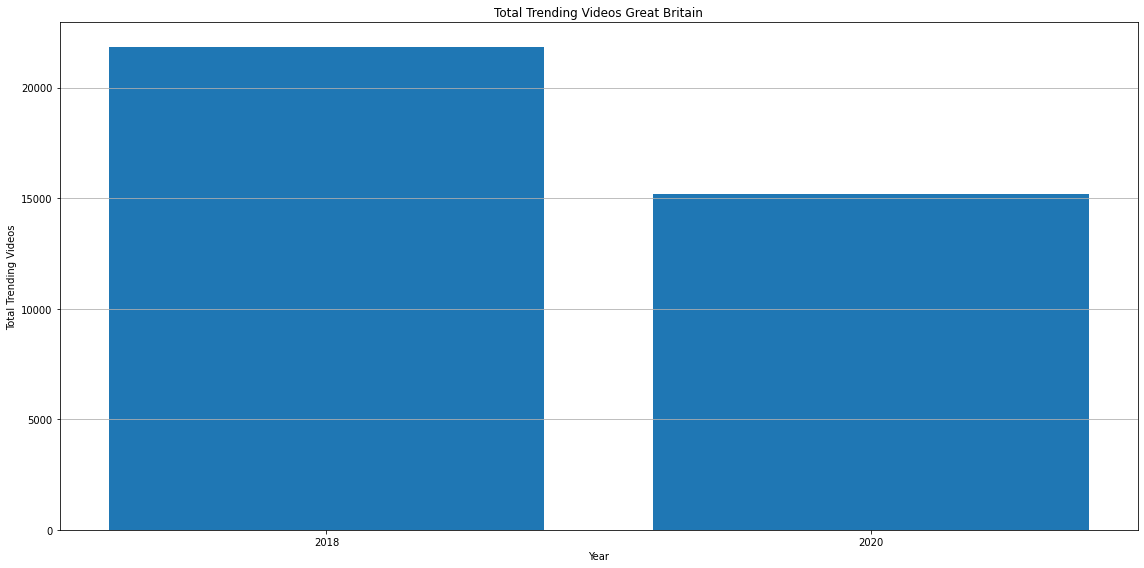

In [24]:
# Total trending videos
totals = [gb_2018_df.shape[0], gb_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count Great Britain 2018: " + str(gb_2018_df.shape[0]))
print("Trending Video Count Great Britain 2020: " + str(gb_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.set_title('Total Trending Videos Great Britain')
ax.yaxis.grid(True)
plt.tight_layout()

# Save plot to file
# file_title = 'GB - ' + title + '.png'
# plt.savefig(save_dir + file_title, dpi=100)

### Total Trending Videos by Category by Year

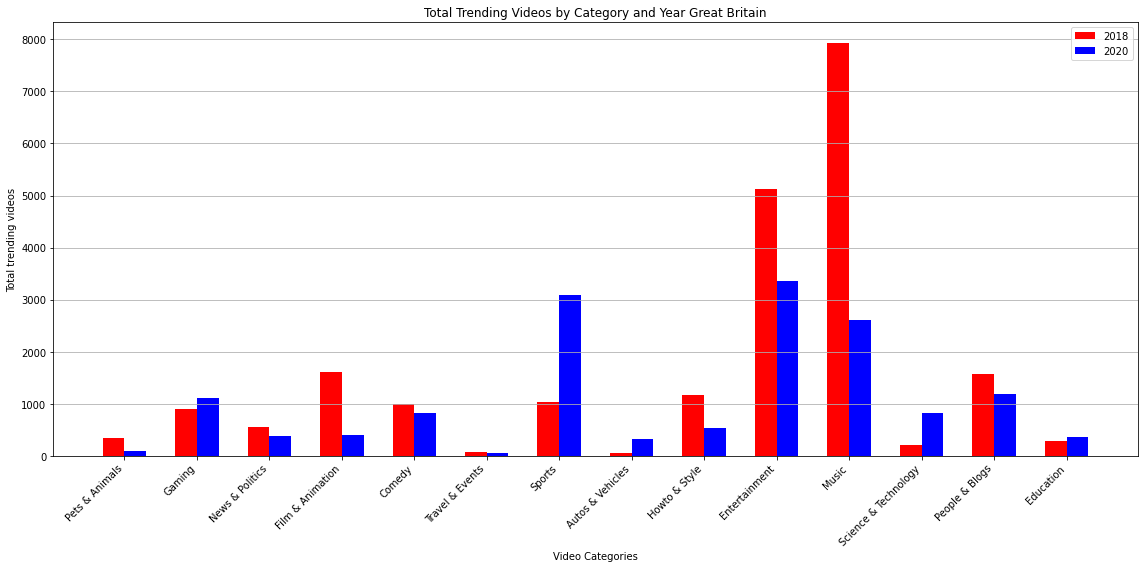

In [25]:
cats_count_2018_series = gb_2018_df.groupby(['cat_name']).count()['title']
cats_count_2020_series = gb_2020_df.groupby(['cat_name']).count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
         sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total trending videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year Great Britain'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Number of Videos by Category

In [26]:
gb_cat_count_merged =  cats_count_2018_series.to_frame().merge(cats_count_2020_series, on='cat_name')
gb_cat_count_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "title_x": "Trending Videos 2018", "title_y": "Trending Videos 2018"})

,Category,Trending Videos 2018,Trending Videos 2018
0,Autos & Vehicles,50,331
1,Comedy,996,821
2,Education,283,362
3,Entertainment,5127,3368
4,Film & Animation,1617,395
5,Gaming,898,1118
6,Howto & Style,1163,528
7,Music,7928,2608
8,News & Politics,550,391
9,People & Blogs,1569,1198


### Average Likes to Views Ratio by Year

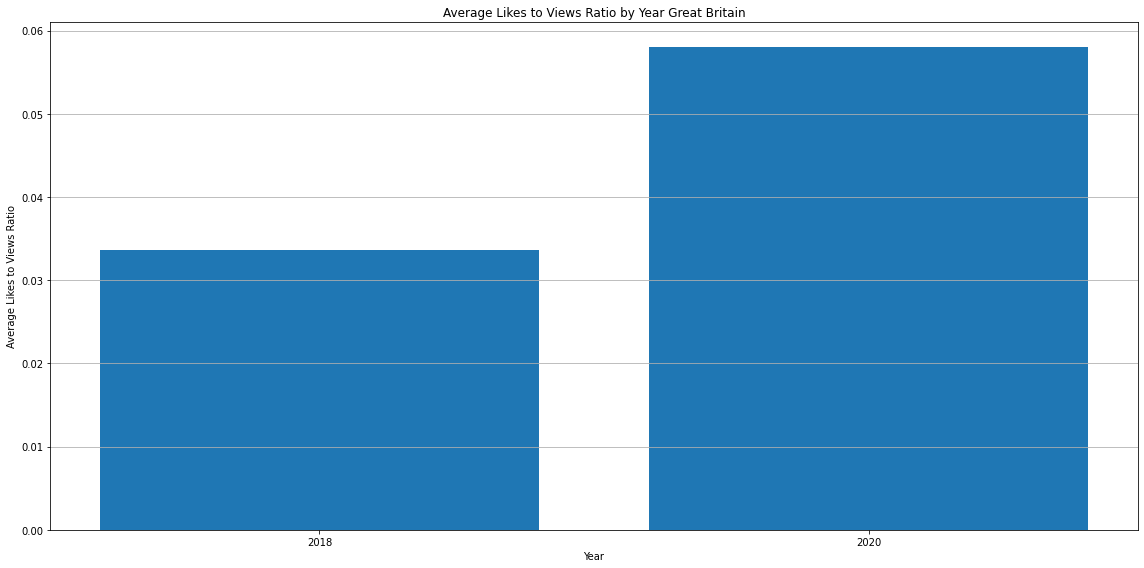

In [27]:
# Avg likes to view ratio
ratio_2018_series = gb_2018_df['likes_to_views'].mean()
ratio_2020_series = gb_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to Views Ratio by Year Great Britain'
ax.set_title(title)
ax.yaxis.grid(True)
# plt.show()
plt.tight_layout()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Summary of Great Britain Data

In [28]:
# Summary of data for Great Britain
print("Total Views per video 2018: " + str(gb_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(gb_2020_df['views'].sum()))
print("Average Likes per video 2018: " + str(gb_2018_df['likes'].mean()))
print("Average Likes per video 2020: " + str(gb_2020_df['likes'].mean()))
print("Like to views ratio 2018: {}" .format(ratio_2018_series))
print("Like to views ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 134948195969
Total Views per video 2020: 30224786256
Average Likes per video 2018: 134474.88453268676
Average Likes per video 2020: 127795.02568324003
Like to views ratio 2018: 0.03360574839926842
Like to views ratio 2020: 0.0580813327695542


### Average Likes to Views Ratio by Categroy by Year

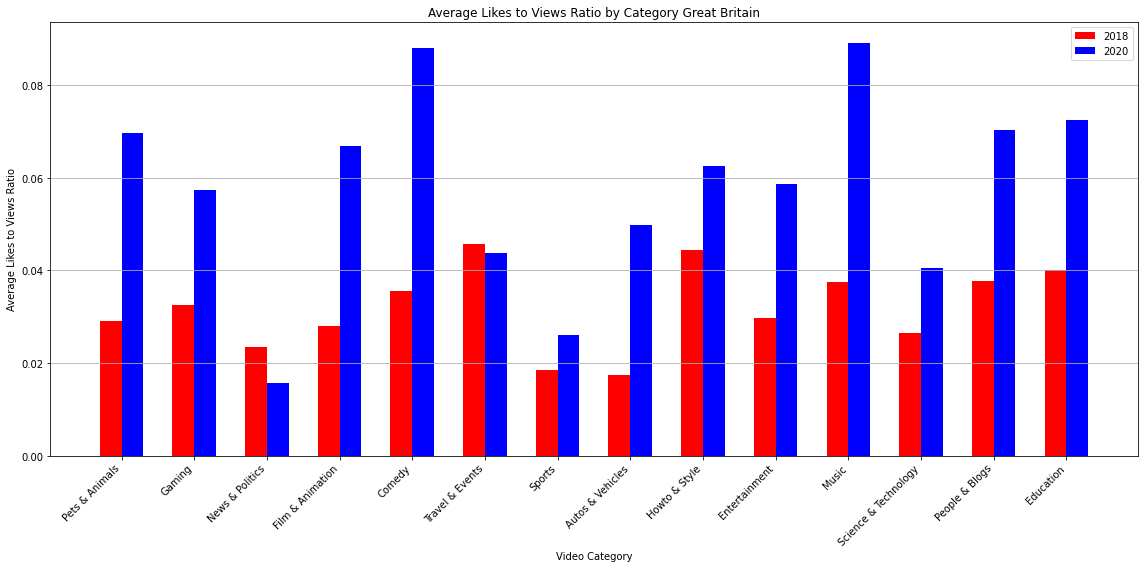

In [29]:
# Avg likes to view ratio by category by year
ratio_2018_series = gb_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = gb_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
         sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category Great Britain'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [30]:
avg_cat_ratio_merged = ratio_2018_series.to_frame().merge(ratio_2020_series, on='cat_name')
avg_cat_ratio_merged = avg_cat_ratio_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "likes_to_views_x": "Avg L-T-V Ratio 2018", "likes_to_views_y": "Avg L-T-V Ratio 2020"})
avg_cat_ratio_merged

,Category,Avg L-T-V Ratio 2018,Avg L-T-V Ratio 2020
0,Autos & Vehicles,0.017372,0.049766
1,Comedy,0.035627,0.088049
2,Education,0.040097,0.072399
3,Entertainment,0.029735,0.058678
4,Film & Animation,0.028075,0.066752
5,Gaming,0.032500,0.057462
6,Howto & Style,0.044382,0.062532
7,Music,0.037526,0.089065
8,News & Politics,0.023602,0.015726
9,People & Blogs,0.037733,0.070305


### Save Data for Analysis

In [31]:
# categorize data by video category
cat_count_gb_2018 = gb_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_gb_2018['likes_to_views'] = ((cat_count_gb_2018['likes'] / cat_count_gb_2018['views'])*100)
cat_count_gb_2018 = cat_count_gb_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_gb_2018 = cat_count_gb_2018[(cat_count_gb_2018['cat_name'] != 'Movies') & (cat_count_gb_2018['cat_name'] != 'Shows')]
cat_count_gb_2018 = cat_count_gb_2018.sort_values(by='likes_to_views')

cat_count_gb_2020 = gb_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_gb_2020['likes_to_views'] = ((cat_count_gb_2020['likes'] / cat_count_gb_2020['views'])*100)
cat_count_gb_2020 = cat_count_gb_2020.rename(columns={'cate"gory_id':'cat_count'})
cat_count_gb_2020 = cat_count_gb_2020.sort_values(by='likes_to_views')

# comparing likes to views for each 
cat_count_gb_merged = cat_count_gb_2018.merge(cat_count_gb_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))

# save df for statistics analysis
gb_merged_likes_to_views = cat_count_gb_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]
gb_merged_likes_to_views.to_csv('./transformed-data/gb_merged_likes_to_views.csv', index=False)

### Great Britian Likes by Year

                cat_name  likes_2018  likes_2020
0        Travel & Events      693766      971463
1       Autos & Vehicles     1451367    16331335
2   Science & Technology    19433136    67278880
3       Film & Animation   101623250    37721937
4         People & Blogs    82185539   131985877
5                  Music  2071810219   917909891
6                 Sports    68406117    72748632
7          Entertainment   389668969   396094404
8         Pets & Animals     8610883     3877654
9        News & Politics    19507058     6311471
10                Comedy    73381502    88483377
11             Education    13267679    27293277
12                Gaming    51505046   140806073
13         Howto & Style    37941970    32753194


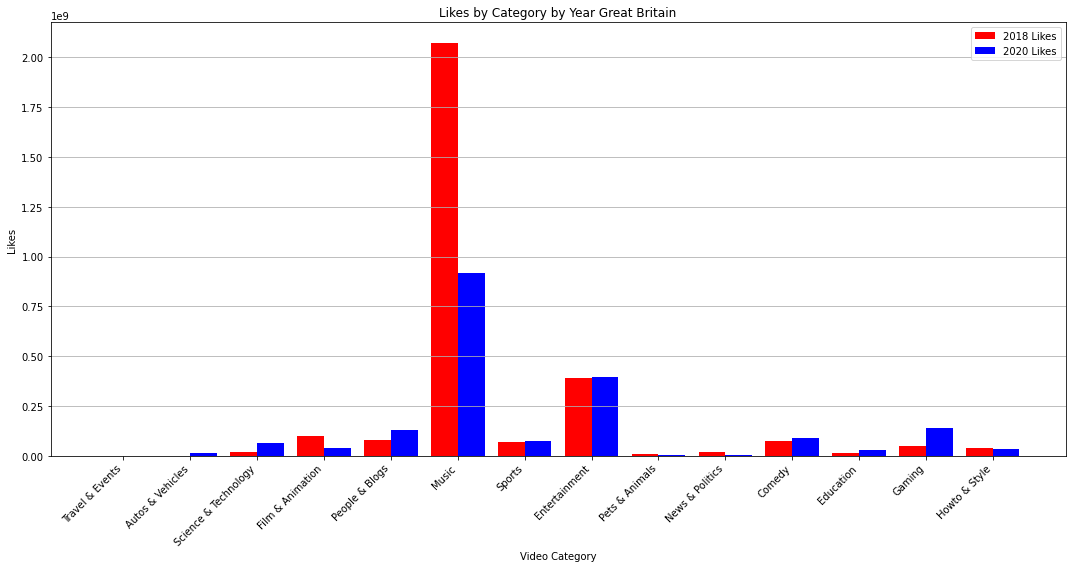

In [32]:
cat_count_gb_merged = cat_count_gb_2018.merge(cat_count_gb_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_gb_merged
print(cat_count_gb_merged[['cat_name', 'likes_2018', 'likes_2020']])

# save df for statistics analysis
gb_merged_likes = cat_count_gb_merged[['cat_name', 'likes_2018', 'likes_2020']]
gb_merged_likes.to_csv('./transformed-data/gb_merged_likes.csv', index=False)

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_gb_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_gb_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_gb_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_gb_merged['cat_name'])
ax.set_xticklabels(cat_count_gb_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

title = "Likes by Category by Year Great Britain"
plt.title(title)
plt.tight_layout()

file_title ='GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### USA Data

In [33]:
# read in data
us_2018_df = pd.read_csv('./transformed-data/2018_US_data.csv')
us_2020_df = pd.read_csv('./transformed-data/2020_US_data.csv')

### Total Trending Videos

Trending Video Count USA 2018: 22350
Trending Video Count USA 2020: 15198


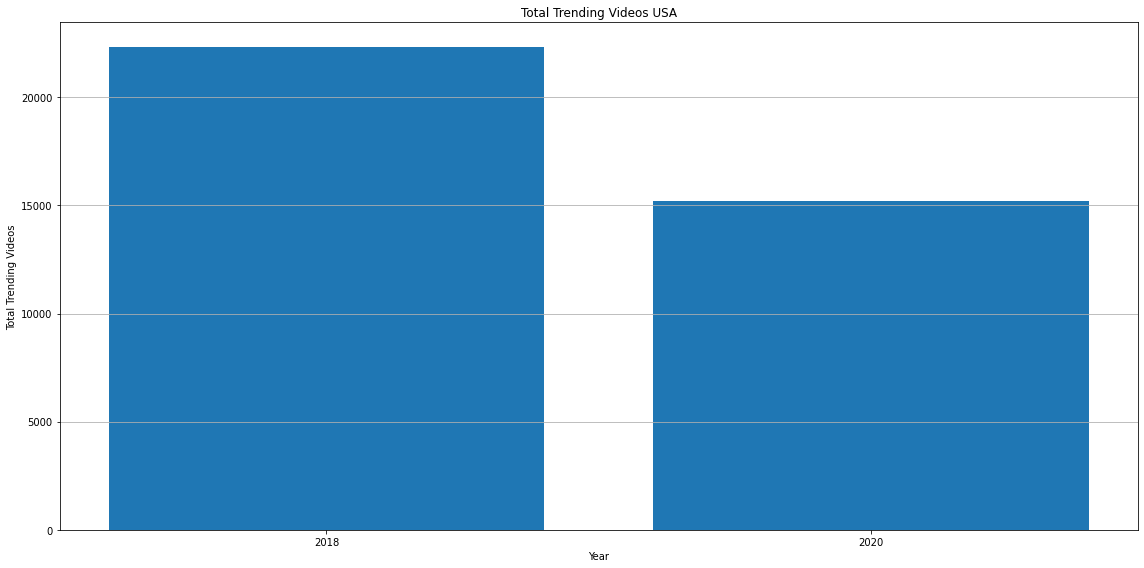

In [34]:
# Total trending videos
totals = [us_2018_df.shape[0], us_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count USA 2018: " + str(us_2018_df.shape[0]))
print("Trending Video Count USA 2020: " + str(us_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Total Trending Videos USA'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()

# Save plot to file
# file_title = 'US - ' + title + '.png'
# plt.savefig(save_dir + file_title, dpi=100)

### Total Trending Videos by Category by Year

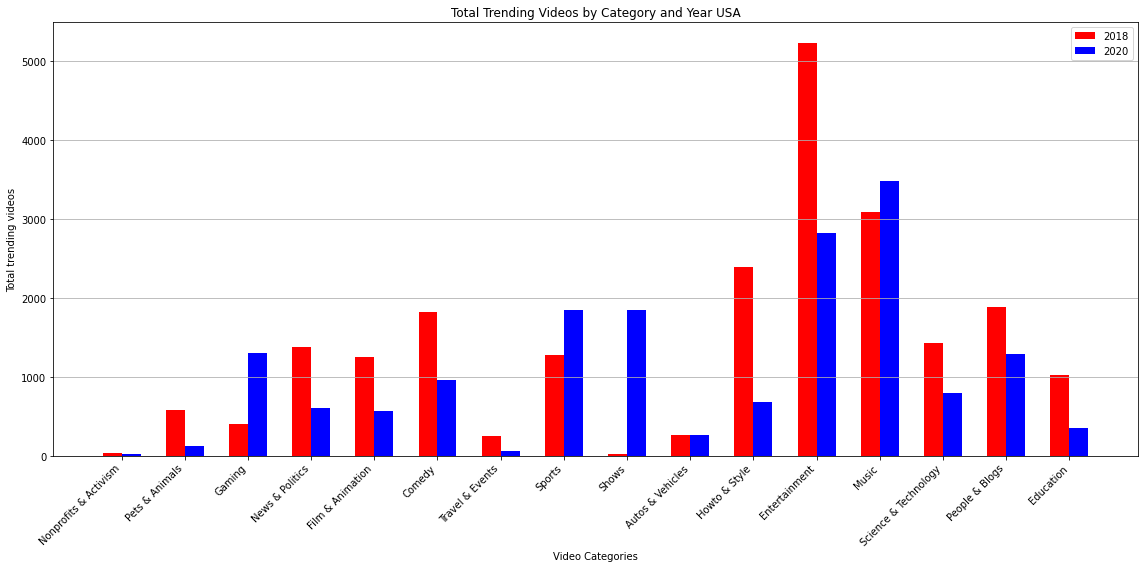

In [35]:
cats_count_2018_series = us_2018_df.groupby('cat_name').count()['title']
cats_count_2020_series = us_2020_df.groupby('cat_name').count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
         sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total trending videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year USA'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Number of Videos by Category

In [36]:
us_cat_count_merged =  cats_count_2018_series.to_frame().merge(cats_count_2020_series, on='cat_name')
us_cat_count_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "title_x": "Trending Videos 2018", "title_y": "Trending Videos 2018"})

,Category,Trending Videos 2018,Trending Videos 2018
0,Autos & Vehicles,270,269
1,Comedy,1819,963
2,Education,1021,358
3,Entertainment,5228,2823
4,Film & Animation,1250,565
5,Gaming,401,1301
6,Howto & Style,2397,687
7,Music,3092,3478
8,News & Politics,1380,613
9,Nonprofits & Activism,34,20


### Average Likes to Views by Year

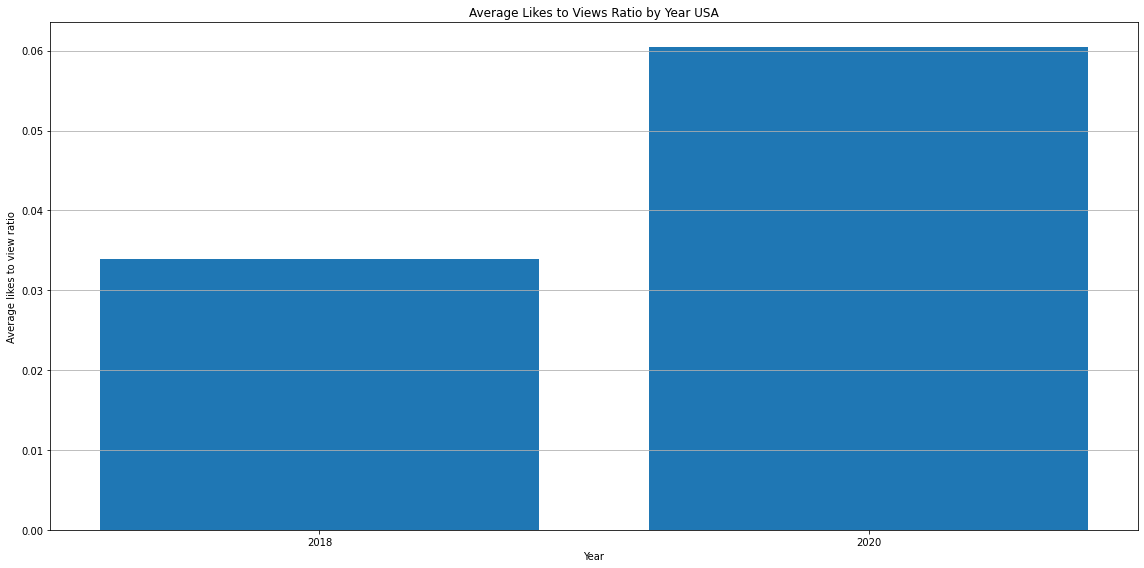

In [37]:
# Avg likes to view ratio
ratio_2018_series = us_2018_df['likes_to_views'].mean()
ratio_2020_series = us_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average likes to view ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to Views Ratio by Year USA'
ax.set_title(title)
ax.yaxis.grid(True)
# plt.show()
plt.tight_layout()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### Summary of USA data

In [38]:
print("Total Views per video 2018: " + str(us_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(us_2020_df['views'].sum()))
print("Average Likes per video 2018: " + str(us_2018_df['likes'].mean()))
print("Average Likes per video 2020: " + str(us_2020_df['likes'].mean()))
print("Like to view ratio 2018: {}" .format(ratio_2018_series))
print("Like to view ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 40626411701
Total Views per video 2020: 40516376084
Average Likes per video 2018: 58841.0096196868
Average Likes per video 2020: 162191.0715883669
Like to view ratio 2018: 0.03397105760908488
Like to view ratio 2020: 0.060514502899822846


### Average Likes to Views Ratio by Category by Year

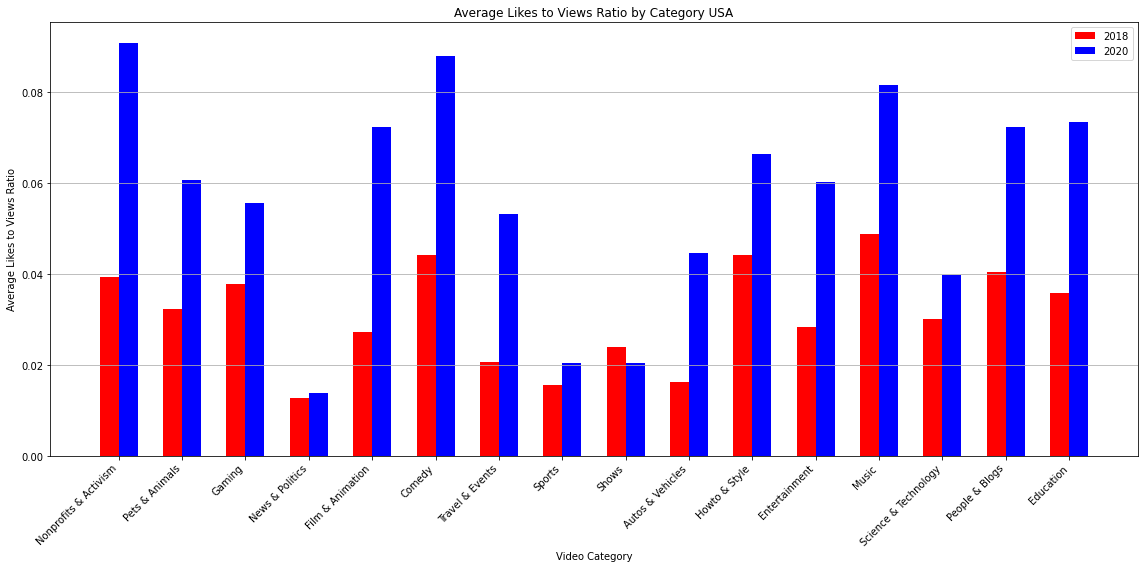

In [39]:
# Avg likes to view ratio by category by year
ratio_2018_series = us_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = us_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
        sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category USA'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [40]:
avg_cat_ratio_merged =  ratio_2018_series.to_frame().merge(ratio_2020_series, on='cat_name')
avg_cat_ratio_merged = avg_cat_ratio_merged.sort_values(by='cat_name').reset_index().rename(columns={"cat_name": "Category", "likes_to_views_x": "Avg L-T-V Ratio 2018", "likes_to_views_y": "Avg L-T-V Ratio 2020"})
avg_cat_ratio_merged

,Category,Avg L-T-V Ratio 2018,Avg L-T-V Ratio 2020
0,Autos & Vehicles,0.016228,0.044596
1,Comedy,0.044267,0.088056
2,Education,0.035932,0.073527
3,Entertainment,0.028394,0.060237
4,Film & Animation,0.027276,0.072337
5,Gaming,0.037721,0.055625
6,Howto & Style,0.044165,0.066374
7,Music,0.048891,0.081491
8,News & Politics,0.012781,0.013850
9,Nonprofits & Activism,0.039397,0.090799


### Save Data for Analysis

In [41]:
# categorize data by video category
cat_count_us_2018 = us_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_us_2018['likes_to_views'] = ((cat_count_us_2018['likes'] / cat_count_us_2018['views'])*100)
cat_count_us_2018 = cat_count_us_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_us_2018 = cat_count_us_2018[(cat_count_us_2018['cat_name'] != 'Movies') & (cat_count_us_2018['cat_name'] != 'Shows')]
cat_count_us_2018 = cat_count_us_2018.sort_values(by='likes_to_views')

cat_count_us_2020 = us_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_us_2020['likes_to_views'] = ((cat_count_us_2020['likes'] / cat_count_us_2020['views'])*100)
cat_count_us_2020 = cat_count_us_2020.rename(columns={'cate"gory_id':'cat_count'})
cat_count_us_2020 = cat_count_us_2020.sort_values(by='likes_to_views')

# comparing likes to views for each 
cat_count_us_merged = cat_count_us_2018.merge(cat_count_us_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))

# save df for statistics analysis
us_merged_likes_to_views = cat_count_us_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]
us_merged_likes_to_views.to_csv('./transformed-data/us_merged_likes_to_views.csv', index=False)

### USA Likes

                 cat_name  likes_2018  likes_2020
0        Autos & Vehicles     2443068    16478809
1         Travel & Events     3389090     1421734
2         News & Politics     8529436    10745366
3                  Sports    66142929    62941905
4        Film & Animation    78568941    54108427
5    Science & Technology    36762476    69628219
6           Entertainment   222917962   447746825
7          Pets & Animals    10029219     5608519
8          People & Blogs    80499535   170899127
9                  Gaming    24279681   195585275
10              Education    22890097    27642739
11                  Music   553470156  1238362701
12                 Comedy   113776570   113942460
13          Howto & Style    76174702    49216056
14  Nonprofits & Activism    14716813      651744


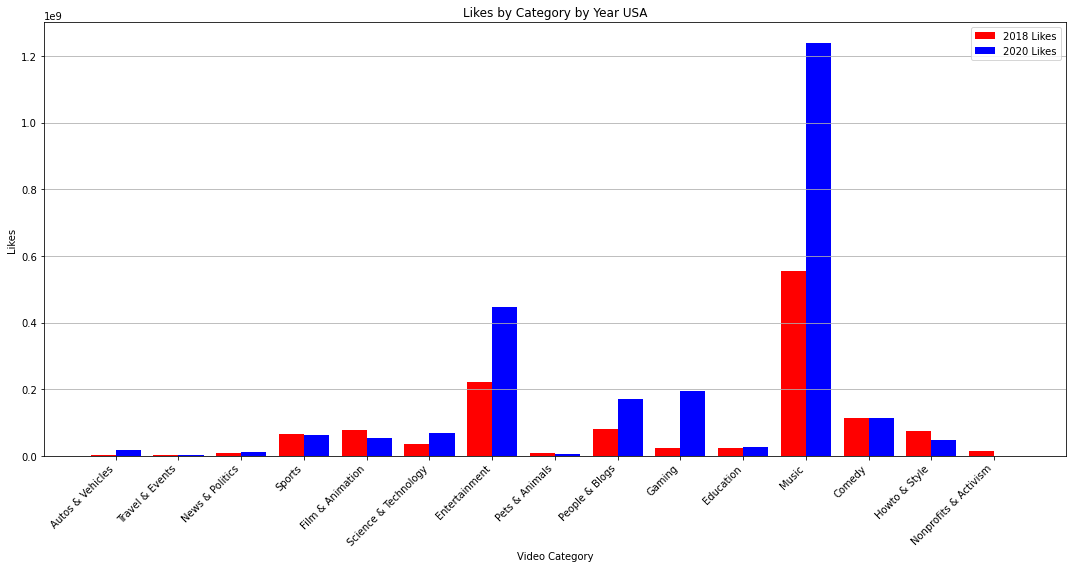

In [42]:
# comparing likes to views for each 
cat_count_us_merged = cat_count_us_2018.merge(cat_count_us_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_us_merged
print(cat_count_us_merged[['cat_name', 'likes_2018', 'likes_2020']])

# save df for statistics analysis
us_merged_likes = cat_count_us_merged[['cat_name', 'likes_2018', 'likes_2020']]
us_merged_likes.to_csv('./transformed-data/us_merged_likes.csv', index=False)

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_us_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_us_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_us_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_us_merged['cat_name'])
ax.set_xticklabels(cat_count_us_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

title = "Likes by Category by Year USA"
plt.title(title)
plt.tight_layout()

file_title ='US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)